<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project</strong></font></h1>

------------------------------------------------

# Kelompok 2 - PYTN KS 019

1. ChristopherBernard S. H
2. Ahmat Zainul M
3. Nur Ishmawati
4. Dyah Ayu Kusuma Wardhani     


# __A. INTODUCTION__
-----------------

Dalam analisis menggunakan konsep Linear Regression, kita dapat menggunakan variabel-variabel seperti jarak, waktu, harga, dan banyak variabel lainnya yang terdapat pada dataset. Dengan membandingkan data dari Uber dan Lyft, kita dapat mengetahui faktor-faktor apa saja yang mempengaruhi tarif Taxi. Selain itu, kita juga dapat membuat prediksi harga untuk dapat membandingkan antara harga prediksi dan harga asli dan memperoleh akurasi yang sesuai.

Analisis ini menggunakan data yang bersumber dari kaggle yaitu Uber vs Lyft. Dataset Uber & Lyft ini berisi 693.071 baris dan 57 kolom. Berdasarkan informasi, hanya ada 10 kolom yang paling relevan. Atribut yang menjadi target yaitu atribut Price, sedangkan atribut lainnya merupakan prediktor.

# __B. IMPORT LIBRARY__
----------------------------

In [1]:
# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler      
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


# Import library untuk modelling/analysis
from sklearn.metrics import r2_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics


# C. DATA LOADING
-------------------

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

df.head(7)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,4

Keterangan dataset:

Dataset ini berisi 57 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:
- ``id`` = nomor identifikasi unik untuk setiap perjalanan
- ``timestamp`` = cap waktu unik untuk penanda perjalanan
- ``hour`` = jam ketika perjalanan dimulai
- ``day`` = hari ketika perjalanan dimulai
- ``month`` = bulan perjalanan dimulai
- ``datetime`` = waktu ketika perjalanan dimulai (dalam bentuk YYYY-MM-DD HH-MM-SS)
- ``timezone`` = zona waktu ketika perjalanan dimulai (hanya satu jenis yaitu America/New_York)
- ``source`` = lokasi awal perjalanan (titik jemput)
- ``destination`` = lokasi tujuan perjalanan
- ``cab_type`` = jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
- ``product_id`` = kode unik untuk identifikasi layanan yang digunakan
- ``name`` = nama mobil layanan yang digunakan
- ``price`` = harga yang dibebankan dalam perjalanan
- ``distance`` = total jarak perjalanan dalam satuan mil
- ``surge_multiplier`` = rasio pengganda tarif perjalanan saat permintaan tinggi
- ``latitude`` = garis lintang lokasi awal perjalanan
- ``longitude`` = garis bujur lokasi awal perjalanan
- ``temperature`` = suhu pada lokasi awal perjalanan
- ``short_summary`` = ringkasan cuaca di lokasi awal



## 2. Melihat Jumlah Baris & Kolom

In [3]:
df.shape

(693071, 57)

## 3. Melihat Tipe Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Data ini memiliki 57 kolom dan 693071 baris, dengan tipe data object, float, dan integer.

# D. DATA CLEANING
------------------------


## 1. Mengecek Missing Value
    Mengecek missing value pada setiap kolom

In [5]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()    

True

In [6]:
# Memeriksa kolom yang terdapat missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Pada dataframe terdapat missing value **55095** pada kolom **'price'**

In [7]:
# Menghitung nilai null pada kolom price
price_missing = df['price'].isnull().sum()

# Menghitung total data pada kolom price
dataprice_total = len(df['price'])

price_missing , dataprice_total

(55095, 693071)

In [8]:
# Menghitung persentase missing value
persentasi_missingVal_price = (price_missing/dataprice_total) * 100
persentasi_missingVal_price

7.949402009317949

- banyak nilai null : 55095
- total data price  : 693071
- Persentase missing value pada kolom price: 7.95%

Total missing value pada kolom **'price'** tidak memiliki jumlah yang terlalu banyak dari total data, sehingga missing value **dihapus**

In [9]:
#Menghapus missing  value pada kolom 'price'
df.dropna(axis=0, inplace=True) 

#Melihat apakah terdapat missing value
df.isnull().values.any()

False

Pada data frame sudah tidak terdapat missing value

## 2. Mengecek Duplicate Data


In [10]:
df.duplicated().sum()

0

Pada dataframe tidak terdapat duplicate data 

## 3. Menggambil kolom yang dibutuhkan

### - Melihat korelasi kolom yg berkaitan dengan temprature dan keadaan cuaca dengan kolom price

In [11]:
temp_corr =df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
                'apparentTemperatureMax','price']]
temp_corr.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


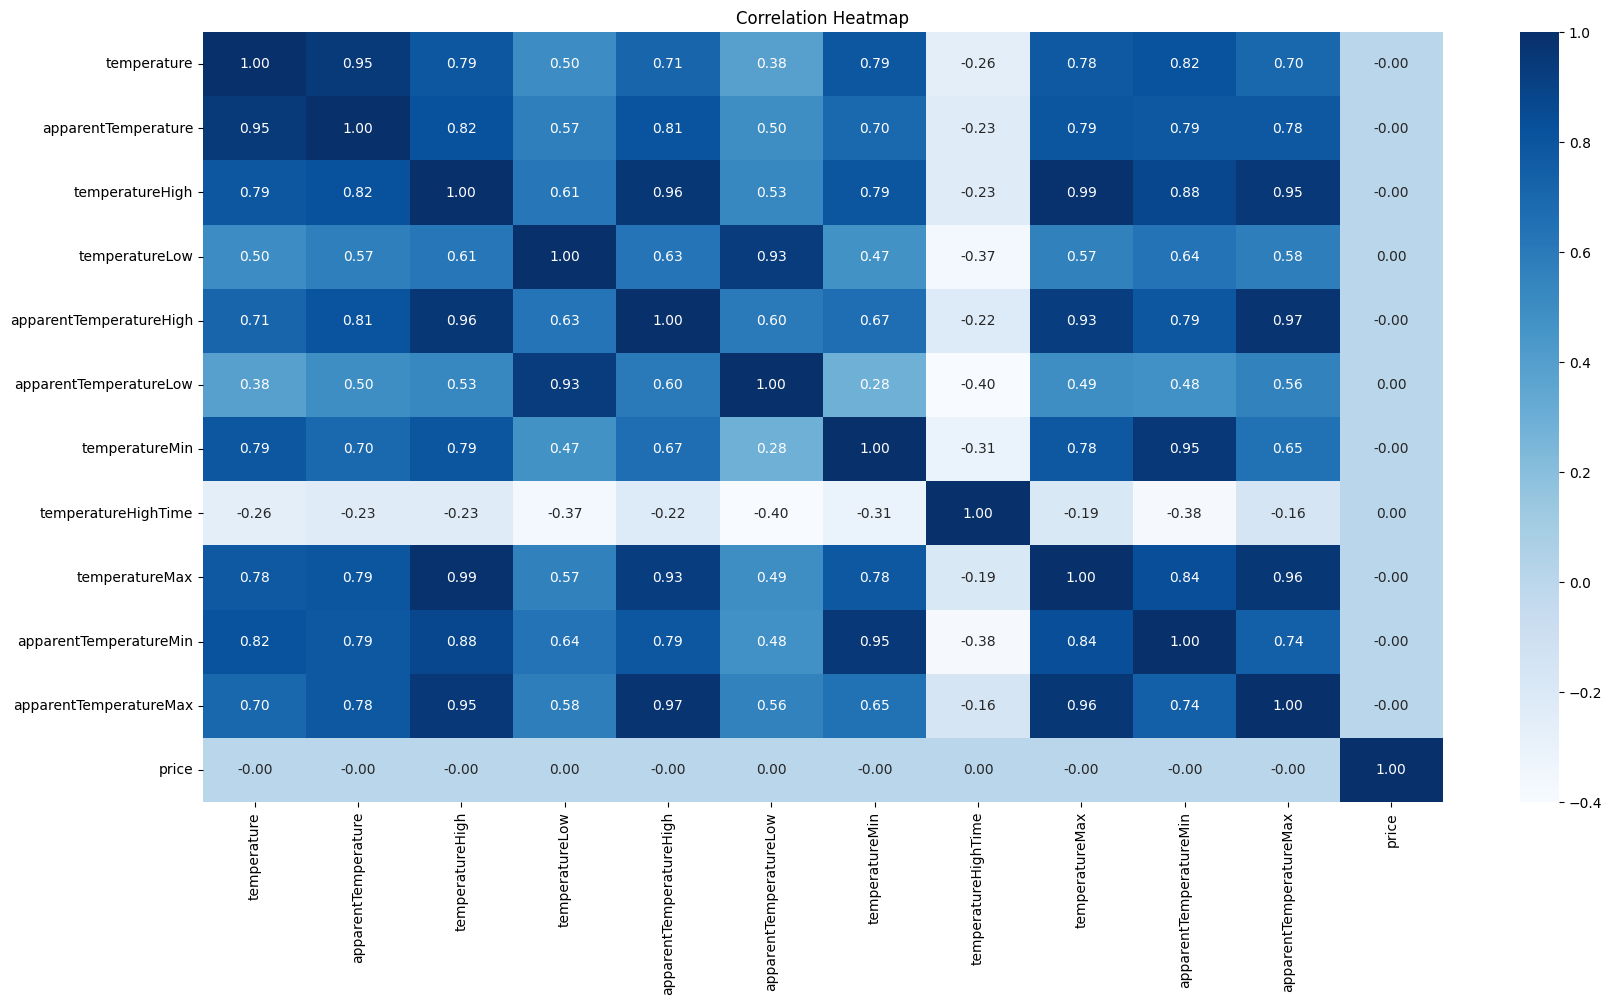

In [12]:
correlation_matrix_temp = temp_corr.corr()

# Menggunakan heatmap untuk visualisasi korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix_temp, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### - Melihat Korelasi antara price dengan kolom yang berkaitan dengan iklim

In [13]:
climate_column = df[['precipIntensity', 'precipProbability', 'humidity', 
                     'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 
                     'windBearing','cloudCover', 'uvIndex', 'ozone', 'moonPhase',
                       'precipIntensityMax','price']]
climate_column.head(3)

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0


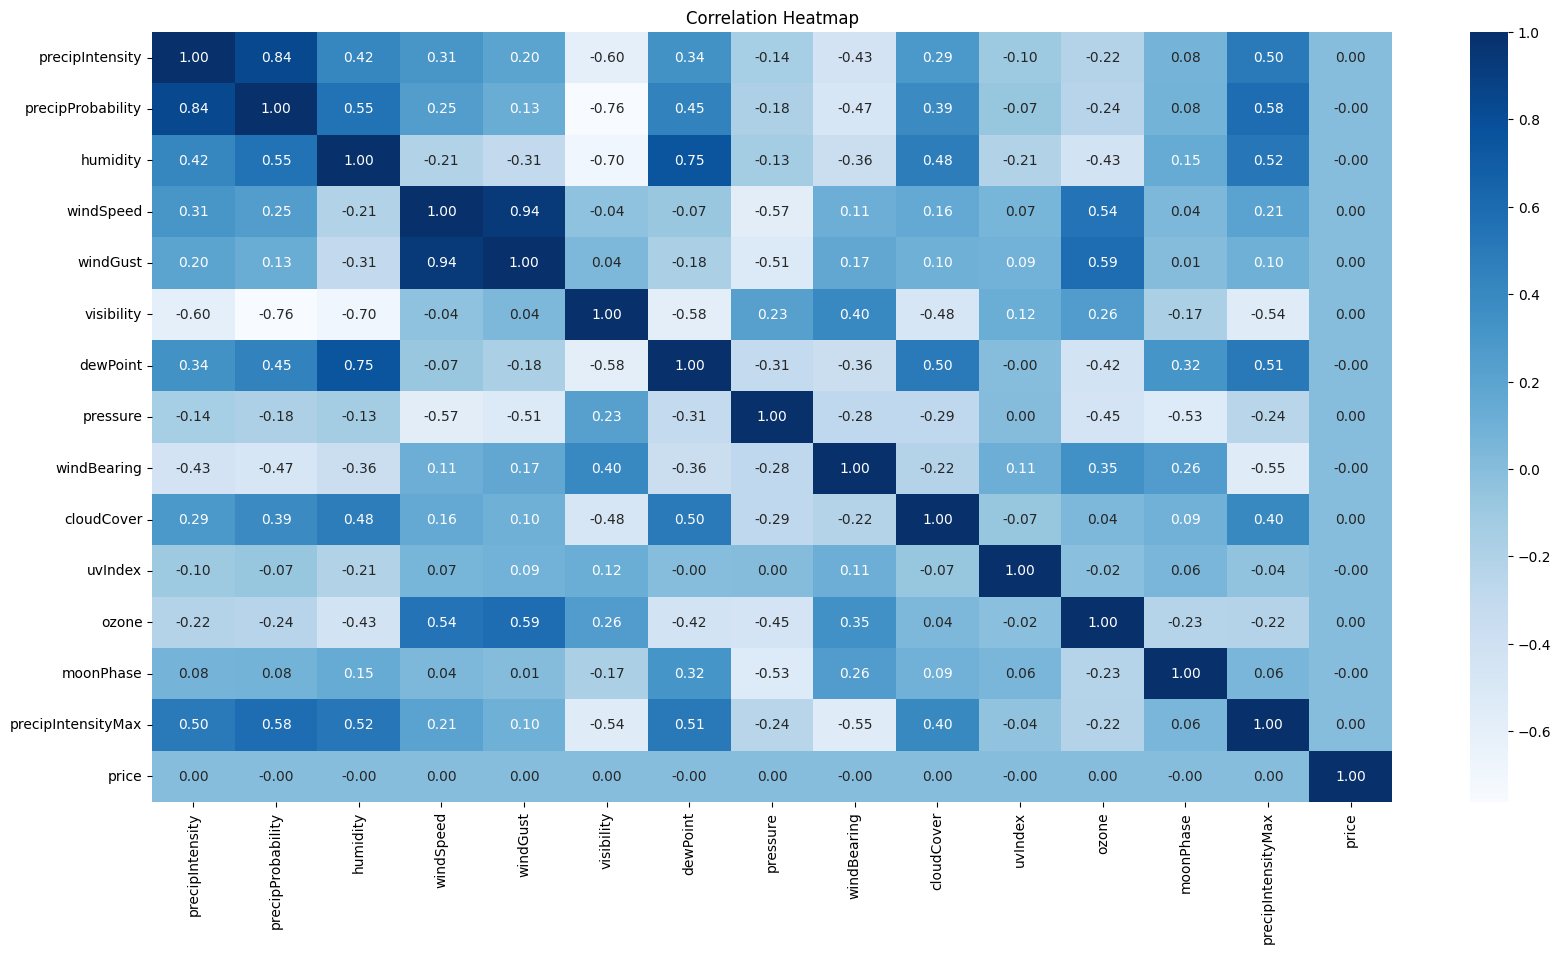

In [14]:
correlation_matrix_climate = climate_column.corr()

# Menggunakan heatmap untuk visualisasi korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix_climate, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Dari Headmap diatas dapat kita lihat bahwa **tidak terdapat kolerasi** kolom **price** dengan kolom yang berkaitan dengan **temperature** dan **iklim**, sehingga kita akan mengambil kolom yang diperlukan 

In [15]:
df_fix = df[['hour', 'day', 'month',
       'source', 'destination', 'cab_type', 'name', 'price',
       'distance', 'surge_multiplier','short_summary']]
df_fix.head(5)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


## 4. Mengganti Nama Kolom
    Mengganti nama kolom 'source' : 'Pickup_loc', 'cab_type' : 'taxi', dan 'short_summary' : 'weather' agar mudah dipahami

In [16]:
df_fix.rename(columns={'source': 'Pickup_loc', 'cab_type':'Taxi', 'short_summary' : 'weather'}, inplace= True)    
df_fix.head()

,hour,day,month,Pickup_loc,destination,Taxi,name,price,distance,surge_multiplier,weather
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


# __E. EXPLORATORY DATA ANALYSIS (EDA)__
----------------------------
    Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Melihat Describe Data

In [17]:
df_fix.describe()

,hour,day,month,price,distance,surge_multiplier
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000


Diperoleh beberapa info seperti berikut:

- Rata rata tarif yang dikeluarkan untuk taksi sekitar 16.5 Dollar.
- Tarif paling murah sekitar 2.5 dollar dengan peralanan sejauh 0.02 miles.
- Jarak tempuh paling jauh 7.86 miles dengan tarif 97.5 dollar.
- Saat pemesanan taxi suhu di tempat sekitar 39.58 derajat F.

In [18]:
# Melihat describe tipe data object
df_fix.describe(include='O')

,Pickup_loc,destination,Taxi,name,weather
count,637976,637976,637976,637976,637976
unique,12,12,2,12,9
top,Financial District,Financial District,Uber,UberXL,Overcast
freq,54197,54192,330568,55096,201429


Diperoleh beberapa info seperti berikut:
- Terdapat 12 tempat dan tujuan (destination) dan 12 lokasi penjemputan (Picup_loc)
- Rute paling banyak dipesan yakni Financial District-South Station
- Terdapat cuaca (short_summary) yang paling sering muncul yakni Overcast

## 2. Mengecek data apakah berdistribusi normal atau skewness

In [19]:
def diagnostic_plots(df_fix, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_fix[variable])
    plt.title('Boxplot')

    plt.show()

In [20]:
select = df_fix[['price']]

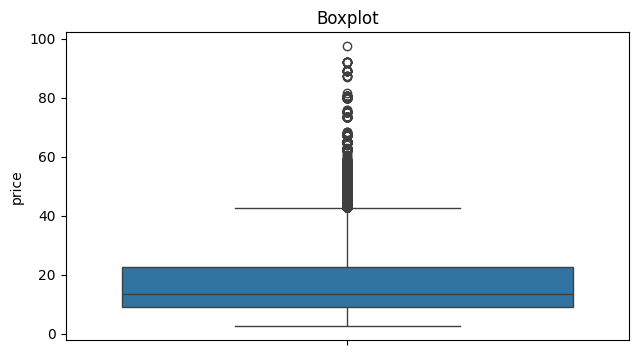

Skewness Value :  1.0457470560899258


In [21]:
diagnostic_plots(select, 'price')
print('Skewness Value : ', select['price'].skew())

Pada dataframe ``df_fix`` terdapat Skewness Value yang relatif kecil yaitu sebesar 1.04, sehingga outliersnya perlu diselesaikan.

### - Mengatasi Outliers

In [22]:
Q1 = df_fix['price'].quantile(0.25)  #rumus Q1
Q3 = df_fix['price'].quantile(0.75)  #rumus Q3
IQR = Q3 - Q1

min_IQR = Q1 - (1.5*IQR) # Lower(batas bawah)
max_IQR = Q3 + (1.5*IQR) # Upper (batas atas)

outliers_upper = df_fix['price'][(df_fix['price'] > max_IQR)]
outliers_lower = df_fix['price'][(df_fix['price'] < min_IQR)]


print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR Price = ', IQR)


Q1 =  9.0
Q3 =  22.5
IQR Price =  13.5


In [23]:
# Menghapus data outliers

print('Jumlah baris data sebelum data outlier dihapus: ',df_fix.shape[0])
df_fix = df_fix.loc[df_fix['price'] < max_IQR]
df_fix = df_fix.loc[df_fix['price'] > min_IQR]

print('Jumlah baris data setelah data outlier dihapus: ',df_fix.shape[0])

Jumlah baris data sebelum data outlier dihapus:  637976
Jumlah baris data setelah data outlier dihapus:  632387


<Axes: xlabel='price'>

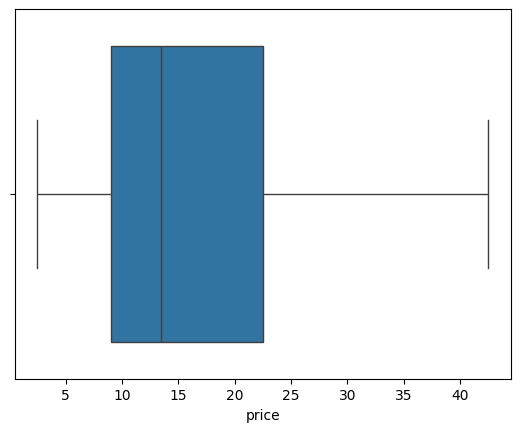

In [24]:
sns.boxplot(x=df_fix["price"])


## 3. Visualisasi dan Analisis

### - **Perbandingan total pemesan taxi Uber dan taxi Lyft**

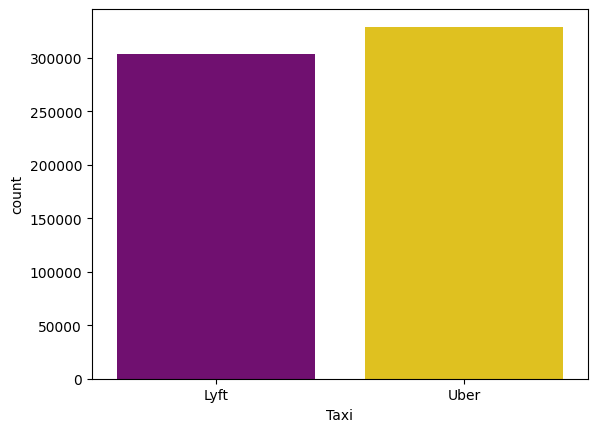

In [25]:
sns.countplot(x="Taxi", data=df_fix, palette= ['purple', 'gold'])
plt.show()

In [26]:
# Total pemesan setiap Taxi
df_fix['Taxi'].value_counts()


Taxi
Uber    329071
Lyft    303316
Name: count, dtype: int64

**Kesimpulan:**
   
    Dari hasil bar chart di atas, dapat diketahui bahwa transportasi online yang paling banyak dipesan oleh penumpang adalah Uber dengan total penumpang 329071 dan Lyft dengan total penumpang 303316.


### - **Perbandingan rata-rata tarif taxi Uber dan taxi Lyft. Dan melihat apakah jenis mobil yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan.**



In [27]:
# Menampilkan rata-rata harga dari taxi Lyft dan Uber
df_fix.groupby('Taxi')['price'].mean()

Taxi
Lyft    16.888435
Uber    15.652528
Name: price, dtype: float64

Dapat diketahui bahwa Taxi Lyft memiliki tarif rata-rata 16.88 dollars, sedangkan Taxi Uber memiliki 15.65 dollars.


<Axes: xlabel='name', ylabel='price'>

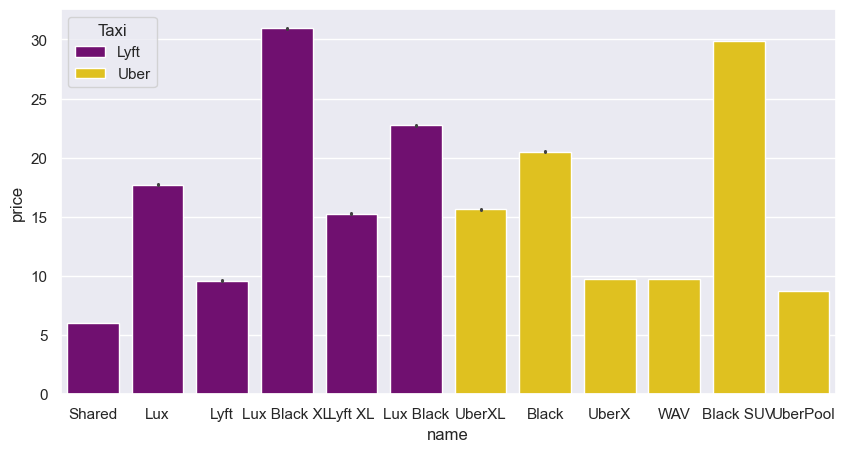

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y='price', x='name', data=df_fix, hue='Taxi', palette= ['purple','gold'])

In [30]:
# Menampilkan nilai mean harga dari setiap jenis mobil
name_price = df_fix.groupby('name')['price'].mean()
name_price

name
Black           20.487195
Black SUV       29.859943
Lux             17.700561
Lux Black       22.737271
Lux Black XL    30.960021
Lyft             9.610885
Lyft XL         15.281224
Shared           6.029893
UberPool         8.752500
UberX            9.764453
UberXL          15.642382
WAV              9.764398
Name: price, dtype: float64

Berdasarkan visualisasi diatas, maka dapat disimpulkan bahwa jenis mobil yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan. Selain itu, diperoleh informasi bahwa:
1) Lyft
    - Tarif tertinggi adalah saat menggunakan jenis mobil Lux Black XL dengan tarif sebesar 30.96 USD
    - Tarif terendah adalah saat menggunakan jenis mobil Shared dengan tarif sebesar 6.02 USD

2) Uber
    - Tarif tertinggi adalah saat menggunakan jenis mobil Black SUV dengan tarif sebesar 29.85 USD
    - Tarif terendah adalah saat menggunakan jenis mobil UberPool dengan tarif sebesar 8.75 USD

### - **Korelasi antara jarak yang ditempuh dengan tarif perjalanan** 


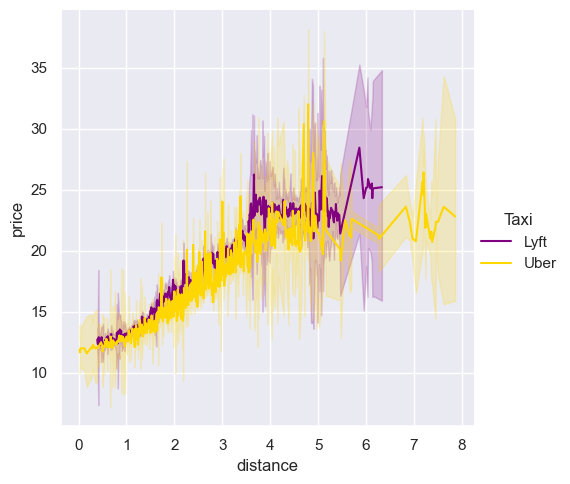

In [31]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data= df_fix,
            hue='Taxi',
            palette = ['purple','gold'])

Kesimpulan:
    
Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh Uber dan Lyft, maka semakin besar pula tarif perjalanannya. Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber. Artinya, ada korelasi antara jarak yang ditempuh dengan tarif perjalanan.

### - **Jenis Taxi dan mobil yang banyak dipesan serta Tarif Taxi berdasarkan Cuaca**

In [33]:
# Menganalisis hubungan kolom Taxi dan Weather
pd.crosstab(df_fix.Taxi, df_fix.weather)

weather,Clear,Drizzle,Foggy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Rain
Taxi,,,,,,,,,
Lyft,38135,3071,3946,24014,63813,96162,55915,7965,10295
Uber,41438,3602,4276,26050,69551,103515,60297,9057,11285


Taxi Uber mendominasi total pemesanan disetiap cuaca

In [34]:
# Jenis mobil taxi yang banyak dipesan berdasarkan cuaca
pd.crosstab(df_fix['name'], df_fix['weather']).style.highlight_max(axis=0, color='lightblue')


weather,Clear,Drizzle,Foggy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Rain
name,,,,,,,,,
Black,6865,589,724,4416,11728,17193,10054,1499,1950
Black SUV,6689,593,707,4259,11381,16996,9774,1483,1857
Lux,6481,517,681,4046,10757,16098,9430,1350,1759
Lux Black,6365,539,655,4016,10607,16088,9434,1266,1696
Lux Black XL,5961,461,649,3787,10049,15293,8810,1251,1609
Lyft,6437,526,652,3992,10817,16268,9481,1359,1703
Lyft XL,6411,536,647,4097,10733,16267,9350,1380,1772
Shared,6480,492,662,4076,10850,16148,9410,1359,1756
UberPool,7020,630,707,4318,11566,17315,10134,1521,1880


 Dari data diatas dapat dilihat type mobil taxi mana saja yang banyak dipesan pada setiap cuaca

In [35]:
# Melihat apakah faktor cuaca dapat membuat tarif menjadi lebih mahal
cuaca = df_fix.pivot_table(values= 'price',
                       index=['surge_multiplier'],
                       columns=['Taxi', 'weather'],
                       aggfunc=np.mean, 
                       fill_value=0)

# Menghitung rata tarif taxi pada cuaca tertentu
cuaca.loc['mean'] = cuaca.mean() 
cuaca = cuaca.T
cuaca = cuaca.reset_index(drop=False)

cuaca.sort_values('mean', ascending=False, inplace=True)

<Axes: xlabel='mean', ylabel='weather'>

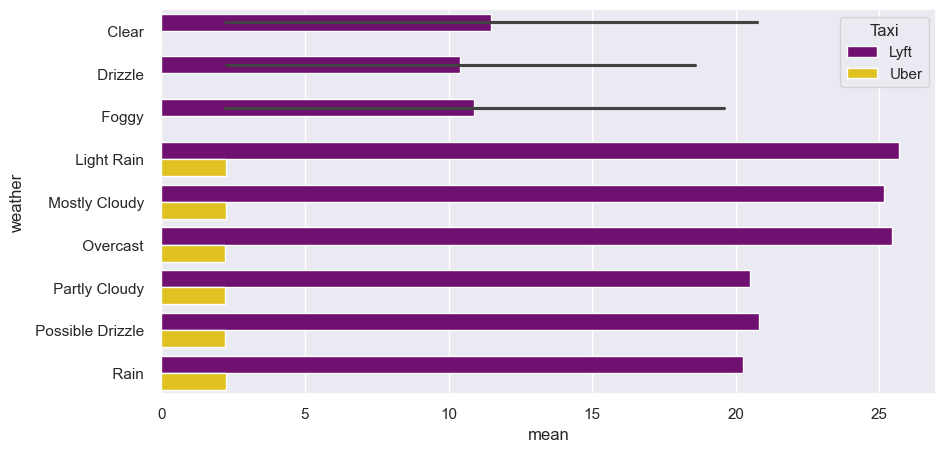

In [36]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mean', y ='weather', hue= df_fix.Taxi, data=cuaca, palette=['purple','gold'])

In [37]:
cuaca

surge_multiplier,Taxi,weather,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
3,Lyft,Light Rain,16.454142,22.664801,24.646789,25.026718,27.900000,30.333333,32.833333,25.694159
5,Lyft,Overcast,16.444819,22.633137,25.008365,25.843195,27.056399,25.405405,35.666667,25.436855
4,Lyft,Mostly Cloudy,16.468536,22.355018,24.719405,25.348921,27.413947,27.777778,32.000000,25.154801
7,Lyft,Possible Drizzle,16.391363,21.833333,24.099138,26.074468,24.517241,32.833333,0.000000,20.821268
0,Lyft,Clear,16.386389,22.319945,24.982301,25.856322,27.864130,27.840909,0.000000,20.749999
6,Lyft,Partly Cloudy,16.489406,22.780456,24.438331,24.976323,27.765217,27.104167,0.000000,20.507700
8,Lyft,Rain,16.402512,22.606267,24.152174,26.463636,26.702703,25.500000,0.000000,20.261042
2,Lyft,Foggy,16.561802,22.583832,25.750000,25.517857,24.176471,22.500000,0.000000,19.584280
1,Lyft,Drizzle,16.547209,21.969072,24.587500,24.029412,24.961538,18.000000,0.000000,18.584962
12,Uber,Light Rain,15.710633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.244376


Kesimpulan:

Berdasarkan analisis data diatas, maka dapat disimpulkan bahwa:
- Taxi Uber memiliki total pemesanan tertinggi pada setiap cuaca
- Cuaca dapat berpengaruh pada tarif sehingga bisa membuat tarif yang didapatkan lebih mahal
- Rata-rata pesanan dengan harga tertinggi berdasarkan cuaca dan pengganda tarif adalah saat cuaca Light Rain pada tipe Lyft yang mencapai nilai rata-rata harga 25.69 USD, pengganda paling tinggi dengan pengganda 3 kali lipat dan harga mencapai 32.83 USD.
- Rata-rata pesanan dengan harga terendah berdasarkan cuaca dan pengganda tarif adalah saat cuaca Foggy pada tipe Uber dengan nilai rata-rata harga 2.22 USD
- Tipe Lyft mendominasi pesanan dengan tarif pengganda tinggi.


In [38]:
# Melihat apakah pengganda tarif dipengaruhi oleh jenis mobil dan tipe taksi
surge_price = df_fix.pivot_table(index='surge_multiplier', columns=['name', 'Taxi'], values='price', fill_value=0)
surge_price 

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
Taxi,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,
1.00,20.487195,29.859943,17.113552,22.178923,30.684030,9.281424,14.735208,6.029893,8.7525,9.764453,15.642382,9.764398
1.25,0.000000,0.000000,21.495038,27.825400,36.443516,11.509698,18.482634,0.000000,0.0000,0.000000,0.000000,0.000000
1.50,0.000000,0.000000,26.178536,32.132503,39.268000,13.731984,22.579467,0.000000,0.0000,0.000000,0.000000,0.000000
1.75,0.000000,0.000000,29.231626,34.272727,0.000000,15.655992,26.056936,0.000000,0.0000,0.000000,0.000000,0.000000
2.00,0.000000,0.000000,31.262438,36.006276,0.000000,17.331658,28.118734,0.000000,0.0000,0.000000,0.000000,0.000000
2.50,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,33.327586,0.000000,0.0000,0.000000,0.000000,0.000000
3.00,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,41.000000,0.000000,0.0000,0.000000,0.000000,0.000000


Kesimpulan :

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:
- Jenis mobil dan tipe taksi yang dipesan berpengaruh kepada pengganda tarif, sehingga harga yang didapatkan bisa lebih mahal
- Taxi uber hanya mengalami pengganda tarif sampai 1.0 saja
- Pengganda tarif terbesar adalah tipe Lyft jenis Lux Black dengan harga 36 USD pada pengganda ke 2.0
- Tipe taksi yang mencapai pengganda tarif ke 3.0 adalah jenis Lyft XL dengan harga pengganda sebesar 41 USD dan jenis Lyft dengan harga pengganda sebesar 29.75 USD

### - **Harga perjalanan pickup Location ke destination**

In [39]:
# Mengetahui rata-rata harga jenis mobil taxi ke location
loc_price = df_fix.pivot_table(values='price',
                       index=['name'],
                       columns=['Pickup_loc','destination'],
                       aggfunc=np.mean,
                       fill_value=0)


loc_price.loc['mean'] = loc_price.mean()


loc_price = loc_price.T
loc_price = loc_price.reset_index(drop=False)
loc_price.sort_values('mean', ascending=False, inplace=True)


In [40]:
#Melihat location dengan harga tertinggi
loc_price.head(3)

name,Pickup_loc,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,mean
24,Financial District,Boston University,34.042595,39.446429,28.035966,36.602489,41.355828,14.248957,24.148459,9.324757,13.400130,14.824903,24.791557,14.824903,24.587248
14,Boston University,Financial District,30.379106,40.175699,26.771942,33.652530,41.180736,14.180111,23.474684,8.689152,10.752918,14.863813,23.167105,14.863813,23.512634
25,Financial District,Fenway,30.551181,38.838636,26.365734,33.130814,41.028226,13.888350,22.988873,8.623440,11.225554,13.560626,22.804319,13.560626,23.047198


In [41]:
#Melihat location dengan harga terendah
loc_price.tail(1)

name,Pickup_loc,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,mean
33,Haymarket Square,North Station,15.613158,26.80409,10.797636,16.604312,26.926287,7.018081,9.166898,4.06815,6.789474,7.171711,9.817105,7.171711,12.329051


Kesimpulan:
- Perjalanan dengan harga rata-rata termahal adalah dari Financial District ke Boston University sebesar 24.58 USD. Harga termahal dengan menggunakan jenis mobil Lux Black XL milik Lyft dengan harga 41.35 USD dan harga termurahnya menggunakan jenis mobil Shared milik Lyft dengan harga 9.32 USD.
- Perjalanan dengan harga rata-rata termurah adalah dari Haymarket Square ke North Station sebesar 12.33 USD. Harga termahal dengan menggunakan jenis mobil Lux Black XL milik Lyft dengan harga 26.92 USD dan harga termurahnya menggunakan jenis mobil Shared milik Lyft dengan harga 4.07 USD.

# __F. DATA PREPROCESSING__
-----------------------------------------------------------



## 1. Analisis Korelasi

In [42]:
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan didata
df_category = df_fix.select_dtypes(include='object')
df_encode = df_fix.copy()

for column in df_category.columns:
    df_encode[column] = label_encoder.fit_transform(df_fix[column])

df_encode.head()

,hour,day,month,Pickup_loc,destination,Taxi,name,price,distance,surge_multiplier,weather
0,9,16,12,5,7,0,7,5.0,0.44,1.0,4
1,2,27,11,5,7,0,2,11.0,0.44,1.0,8
2,1,28,11,5,7,0,5,7.0,0.44,1.0,0
3,4,30,11,5,7,0,4,26.0,0.44,1.0,0
4,3,29,11,5,7,0,6,9.0,0.44,1.0,6


In [44]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df ,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap='Blues', 
                linewidths=.5, 
                linecolor='black', 
                square=True) 
    

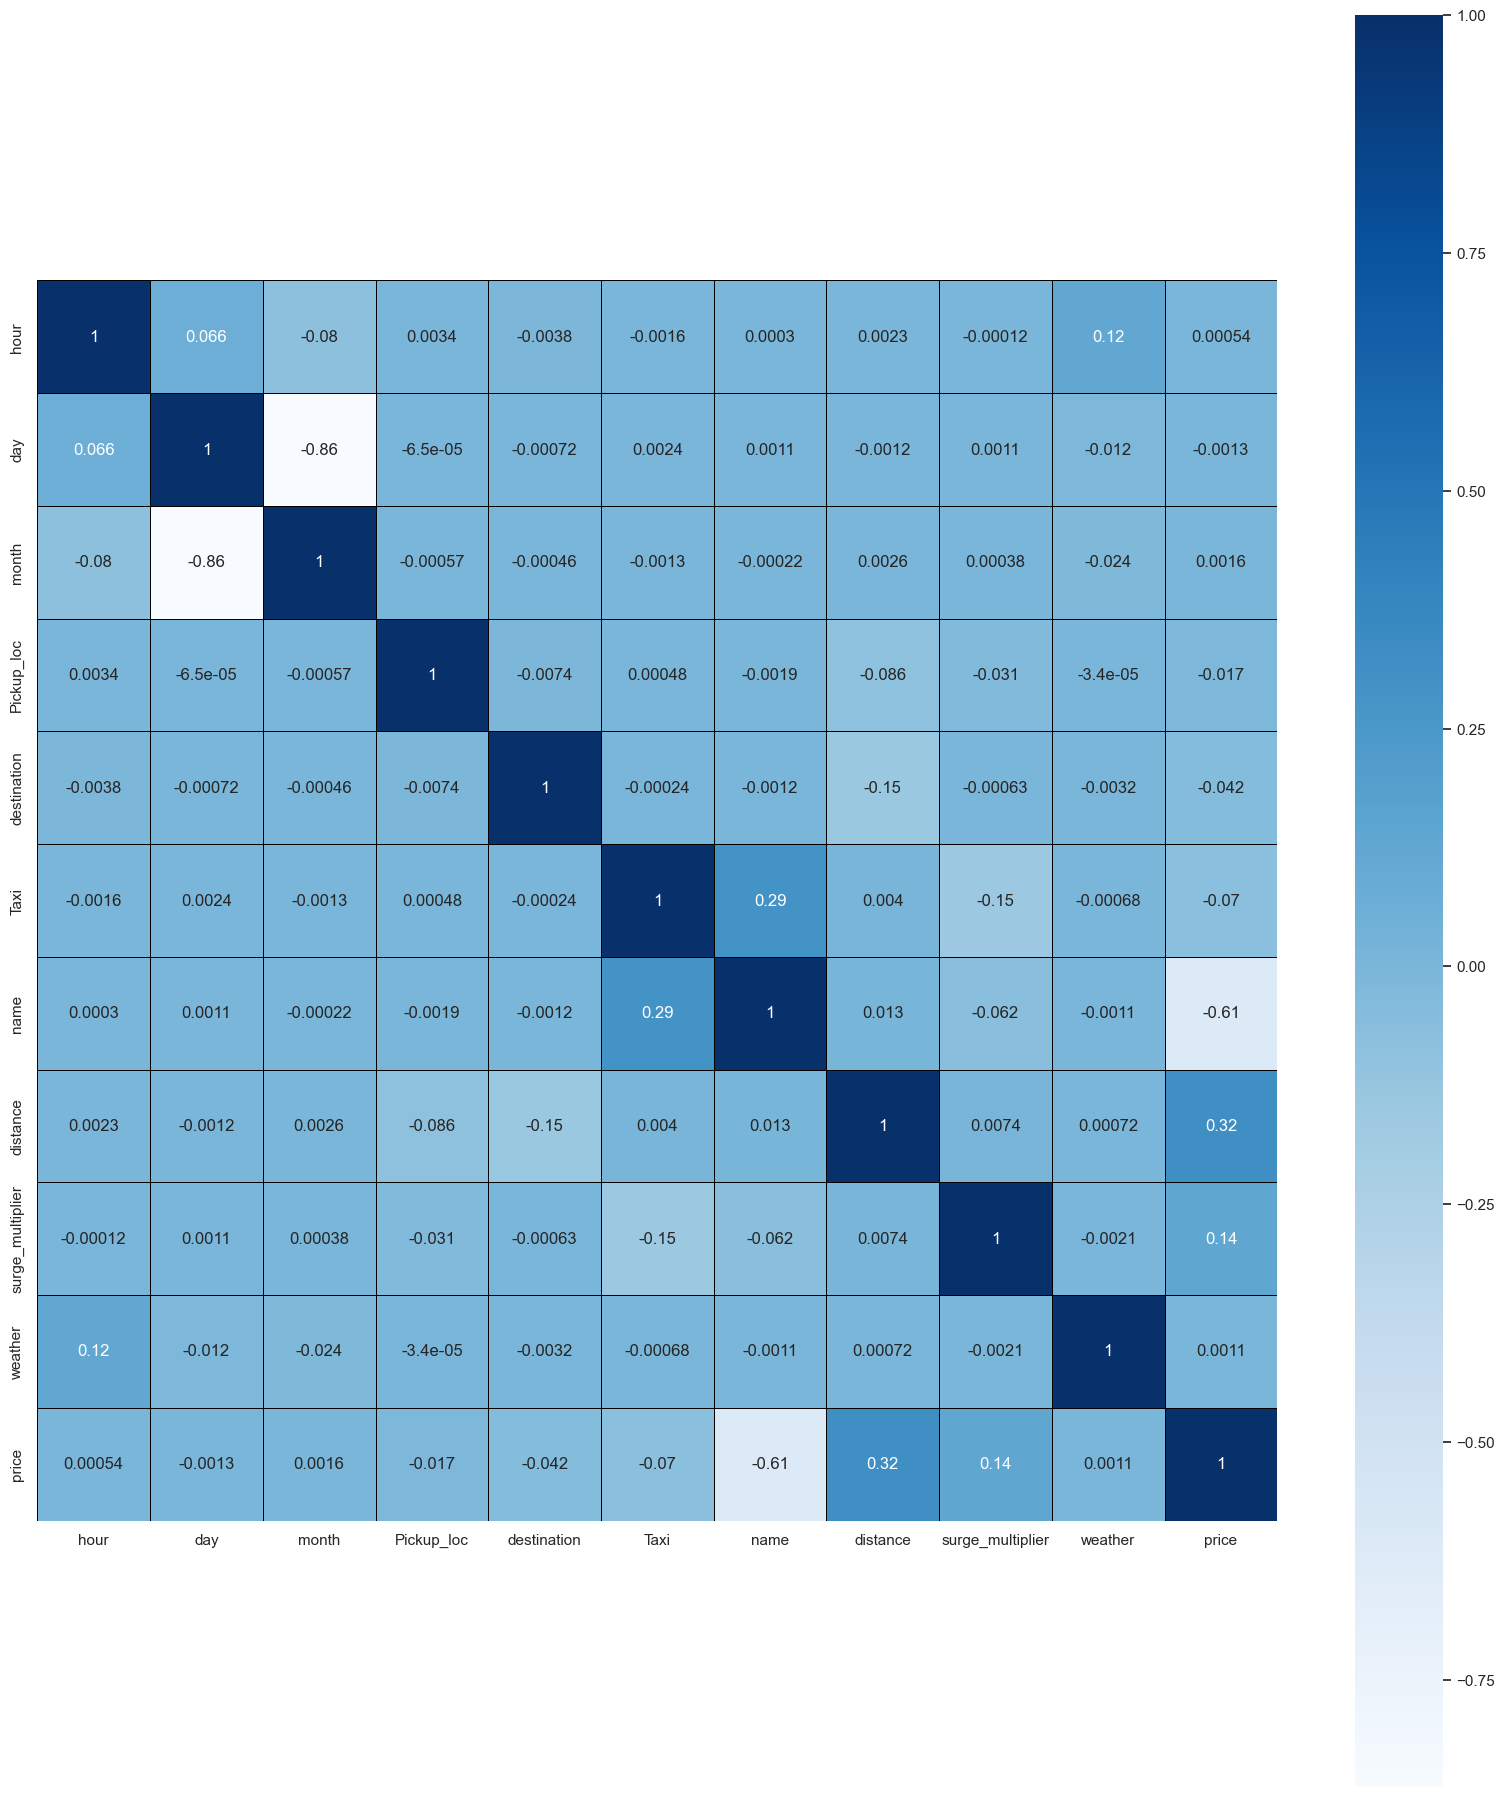

In [45]:
heatmap_modeling= ['hour','day','month','Pickup_loc','destination','Taxi','name',
             'distance','surge_multiplier','weather','price']
heat_map(df_encode, heatmap_modeling)

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi. Kolom tersebut diantaranya adalah sebagai berikut:
- Pickup_loc dengan korelasi sebesar -0,017
- destination dengan korelasi sebesar -0,042
- Taxi, dengan korelasi sebesar -0.07
- name, dengan korelasi sebesar -0.61
- distance, dengan korelasi sebesar 0.32
- surge_multiplier, dengan korelasi sebesar 0.14
- weather, dengan korelasi sebesar 0.0011
- Price, dengan korelasi sebesar 1


## 2. Membuat Data Frame (ENCODE)

In [46]:
encode_fix = pd.DataFrame(df_encode.loc[:,['Pickup_loc', 'destination'	,'Taxi'	,'name','price'	,'distance'	
                                           ,'surge_multiplier'	,'weather']])
encode_fix.head(3)

,Pickup_loc,destination,Taxi,name,price,distance,surge_multiplier,weather
0,5,7,0,7,5.0,0.44,1.0,4
1,5,7,0,2,11.0,0.44,1.0,8
2,5,7,0,5,7.0,0.44,1.0,0


In [47]:
# melihat uniq value
category_col = encode_fix.columns.tolist()
for column in encode_fix[category_col]:
    print(f'{column} : {encode_fix[column].unique()}')
    print()

Pickup_loc : [ 5  0  6  7  1  2  3  9 10 11  4  8]

destination : [ 7  8 11  5  9  3 10  1  0  6  4  2]

Taxi : [0 1]

name : [ 7  2  5  4  6  3 10  0  9 11  1  8]

price : [ 5.   11.    7.   26.    9.   16.5  10.5   3.   27.5  13.5  12.   16.
  7.5   5.5   3.5   8.5  15.   20.5  19.5  29.5   9.5  22.   13.   17.
 10.   34.   18.5  36.   22.5  32.5  25.   27.   35.    8.   23.5  14.
 26.5  38.5  23.   30.5  17.5  30.   36.5  12.5  33.5  21.5  38.   18.
 33.   32.    6.5  11.5  31.5  28.5  24.   29.   31.   42.5  41.   19.
 15.5  21.   28.   37.5  14.5   4.5  40.5  42.   24.5  41.5  25.5  39.
 20.   39.5   6.   35.5  37.   34.5   2.5  40.   37.85 18.35 28.35 10.6
  7.98  8.35 11.6   9.35 19.35]

distance : [0.44 1.08 1.11 0.72 2.48 3.24 2.94 1.76 0.71 1.23 1.16 2.67 3.39 2.82
 2.49 3.07 1.57 3.2  3.61 3.05 1.75 2.36 2.32 1.02 1.17 4.43 1.4  1.01
 2.84 1.81 1.3  2.44 3.04 2.59 3.25 2.66 3.26 2.39 3.28 2.81 3.18 2.63
 3.14 1.79 2.16 1.39 1.97 2.92 2.14 0.91 2.58 3.23 3.02 0.64 2.38 0.8
 2

## 3. One Hot Encoding


In [48]:
df_OHE = pd.DataFrame(df_fix.loc[:,['Pickup_loc', 'destination'	,'Taxi'	,'name','price'	,'distance'	,'surge_multiplier'	,'weather']])
df_OHE.head()

,Pickup_loc,destination,Taxi,name,price,distance,surge_multiplier,weather
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


In [49]:
def one_hot_encoder(data, feature, keep_first=True):

    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)

    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [50]:
# Melakukan copy dataframe df_kondisi3 menjadi df_onehot_kondisi3
df_onehot = df_OHE.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot= one_hot_encoder(df_onehot, col)

df_onehot = df_onehot.replace({True: 1, False: 0})

# Menampilkan 5 baris pertama dari dataframe df_onehot_kondisi3
df_onehot.head(5)

,price,distance,surge_multiplier,Pickup_loc_Back Bay,Pickup_loc_Beacon Hill,Pickup_loc_Boston University,Pickup_loc_Fenway,Pickup_loc_Financial District,Pickup_loc_Haymarket Square,Pickup_loc_North End,Pickup_loc_North Station,Pickup_loc_Northeastern University,Pickup_loc_South Station,Pickup_loc_Theatre District,Pickup_loc_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Taxi_Lyft,Taxi_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# G. PENDEFINISIAN DATA
--------------------------

   
Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu **'Pickup_loc', 'destination'	,'Taxi'	,'name','price'	,'distance'	,'surge_multiplier', dan 'weather'**

Metode pengujian yang akan digunakan pada project kali ini adalah metode Linear Regression. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.

In [51]:
#Membuat model Linear Regression Label Encoder
model1 = LinearRegression()

#Membuat model Linear Regression One Hot Encoding
model2 = LinearRegression()


# H. PELATIHAN MODEL
---------------------------------------------
    Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

## 1) Data Label Encoder


In [52]:
x = encode_fix.drop(columns=['price'],axis=1).values
y = encode_fix['price'].values

# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
model_encode = model1.fit(x_train1, y_train1)
y_pred1 = model_encode.predict(x_test1)

In [54]:
# melihat score x_train1, y_train1 darai data One Hot Encoding
model1.score(x_train1, y_train1)

0.4994400700711178

In [55]:
#melihat score x_test1, y_test1 darai data One Hot Encoding
model1.score(x_test1, y_test1)

0.498672367803754

## 2. Data One Hot Encoding

In [56]:
x = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

# Memisahkan data menjadi data training dan data testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
model_onehot = model2.fit(x_train2, y_train2)
y_pred2 = model_onehot.predict(x_test2)

In [58]:
# melihat score x_train2, y_train2 darai data One Hot Encoding

model2.score(x_train2, y_train2)

0.9342558385028052

In [ ]:
#melihat score x_test2, y_test2 darai data One Hot Encoding
model2.score(x_test2, y_test2)

0.935297758738833

# I. EVALUASI MODEL
________________________________________

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Evaluasi menggunkan metode Linear Regression sebagai berikut :
1. R-squared, MSE, RMSE dan Akurasi

    - R-squared adalah metrik penting dalam regresi karena memberikan informasi tentang seberapa baik model sesuai dengan data observasi. Semakin tinggi nilai R-squared, semakin baik modelnya.
    - MSE memberikan bobot yang lebih besar kepada kesalahan yang besar, sehingga mengukur tingkat presisi model dalam memprediksi data. Semakin rendah nilai MSE, semakin baik modelnya. 
    - RMSE adalah akar kuadrat dari MSE dan digunakan untuk mengukur kesalahan prediksi model dalam unit yang sama dengan variabel target. RMSE sering digunakan untuk mengukur kesalahan prediksi dalam konteks yang lebih intuitif.
Seperti MSE, semakin rendah nilai RMSE, semakin baik modelnya.
    - Akurasi (Accuracy): Akurasi mengukur sejauh mana model benar dalam mengklasifikasikan data. Ini adalah metrik umum untuk masalah klasifikasi.
  
  
2. Melihat Akurasi model

3. Melihat harga hasil prediksi dan perbandingan dengan harga aktual

4. Membuat visualisasi regresi masing-masing kondisi 

## 1. Data Label Encode



### - Membandingkan nilai R-squared, MSE, RMSE

In [59]:
# Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
R_squared1 = r2_score(y_test1, y_pred1)

# Menghitung Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test1, y_pred1)  

# Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1) 

In [60]:
# Mencetak nilai R-squared, MSE, RMSE
print("R-squared :", R_squared1)  
print("MSE :", mse1)
print("RMSE :", rmse1)  

R-squared : 0.498672367803754
MSE : 38.72583916307546
RMSE : 6.223008851277287


### - Melihat Akurasi Model

In [61]:
# Melihat Akurasi Model 
linier = model1.fit(x_train1, y_train1)

print("accuracy :" + str(linier.score(x_test1, y_test1)))
print("variance :" + str(explained_variance_score(y_test1, y_pred1)))

accuracy :0.498672367803754
variance :0.49867396105000283


In [62]:
#Menghitung MAPE
errors1 = abs(y_pred1 - y_test1)
mape1 = 100 * (errors1/ y_test1)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape1)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 60.92 %.


### - Perbandingan hasil prediksi dengan harga aktual

In [63]:
y_pred1

array([26.91468197, 23.53194206, 14.72815687, ..., 19.4916708 ,
       16.48954831, 23.99009373])

In [64]:
aktual_prediksi1 = pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
aktual_prediksi1.head(7)

,Actual,Predicted
0,38.5,26.914682
1,42.5,23.531942
2,7.0,14.728157
3,6.5,10.937325
4,9.0,14.799358
5,29.0,24.661833
6,5.0,10.482705


### - Visualisasi Regresi Data Encode

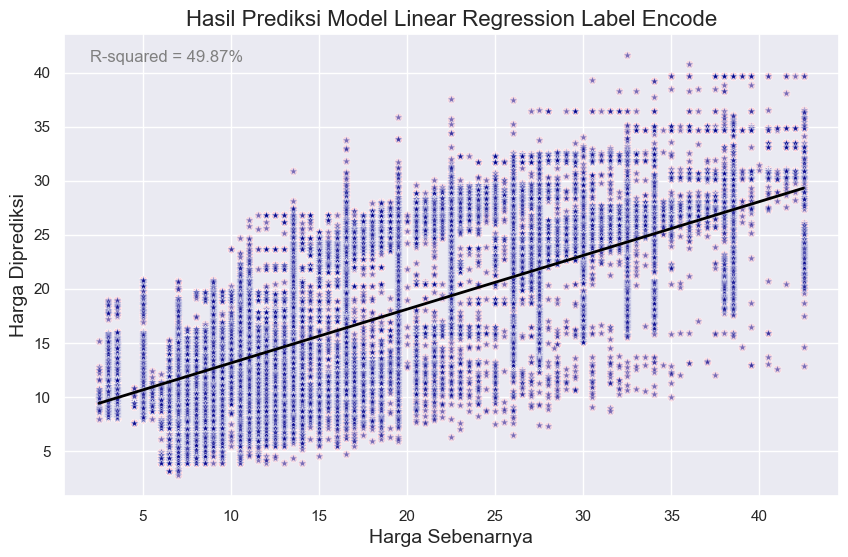

In [65]:
dat_encod1 = (y_test1 < 50) # kondisi untuk subset pertama
subset1_x1 = y_test1
subset1_y1 = y_pred1

subset2_x1 = y_test1
subset2_y1 = y_pred1

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(10,6))
sns.scatterplot(x=subset1_x1, y=subset1_y1, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x1, y=subset2_y1, color='darkblue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test1, y=y_pred1, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Label Encode', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 41, f'R-squared = {round(r2_score(y_test1, y_pred1)*100, 2)}%', fontsize=12, color='grey')

plt.show()

## 2. Data One Hot Encoding

In [66]:
# Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
R_squared2 = r2_score(y_test2, y_pred2)

# Menghitung Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test2, y_pred2)  

# Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2) 

In [67]:
# Mencetak nilai R-squared, MSE, RMSE
print("R-squared :", R_squared2)  
print("MSE :", mse2)
print("RMSE :", rmse2)  

R-squared : 0.935297758738833
MSE : 4.9980260964143595
RMSE : 2.23562655566943


### - Melihat Akurasi Model 

In [68]:
linier2 = model2.fit(x_train2, y_train2)

print("accuracy :" + str(linier2.score(x_test2, y_test2)))
print("variance :" + str(explained_variance_score(y_test2, y_pred2)))

accuracy :0.935297758738833
variance :0.9352981913354722


In [69]:
#Menghitung MAPE
errors2 = abs(y_pred2 - y_test2)
mape2 = 100 * (errors2/ y_test2)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape2)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 87.35 %.


### - Perbandingan hasil prediksi dengan harga aktual

In [70]:
y_pred2

array([30.96092796, 37.50361443,  8.25145531, ..., 15.24140739,
        9.59280205, 29.21951103])

In [71]:
aktual_prediksi2 = pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
aktual_prediksi2.head(7)

,Actual,Predicted
0,38.5,30.960928
1,42.5,37.503614
2,7.0,8.251455
3,6.5,6.449911
4,9.0,8.240110
5,29.0,29.847789
6,5.0,4.010542


### - Visualisasi Regresi Data One Hot Econding

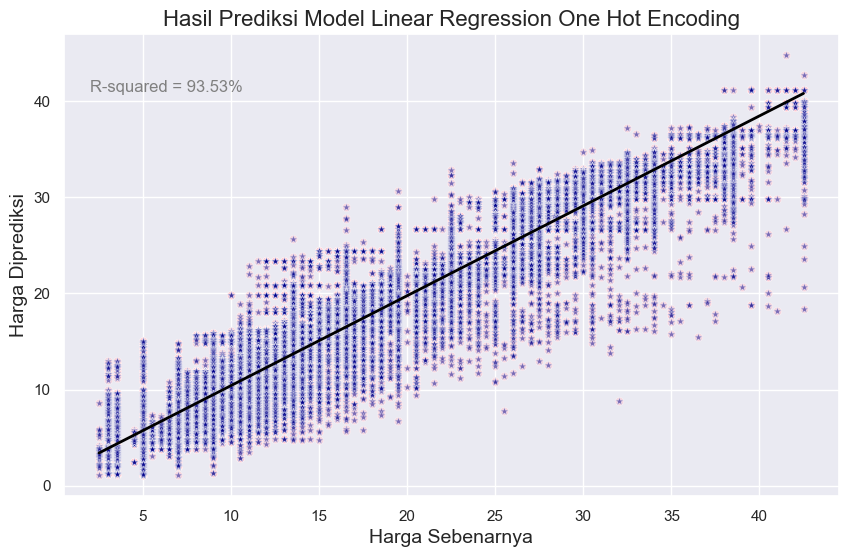

In [72]:
dat_encod2 = (y_test2 < 50) # kondisi untuk subset pertama
subset1_x2 = y_test2
subset1_y2 = y_pred2

subset2_x2 = y_test2
subset2_y2 = y_pred2

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(10,6))
sns.scatterplot(x=subset1_x2, y=subset1_y2, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x2, y=subset2_y2, color='darkblue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test2, y=y_pred2, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression One Hot Encoding', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 41, f'R-squared = {round(r2_score(y_test2, y_pred2)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# J. MODEL IMPROVMENT
------------------------------------------

Model Improvement adalah memperbaiki model dengan tujuan untuk meningkatkan akurasi. Pada project ini digunakan metode model improvement bernama GridSearchCV dan Cross Validation.

## 1. Mengoptimalkan Model Menggunakan GridSearchCV


In [73]:
# Import Library
from sklearn.model_selection import GridSearchCV

### - Menggunakan Label Encode

In [74]:
X = encode_fix.drop(columns=['price'],axis=1).values
y = encode_fix['price'].values

In [75]:
X_train_Grid1, X_test_Grid1, y_train_Grid1, y_test_Grid1 = train_test_split(X, y, test_size=0.2, random_state=42) 

# Tentukan  parameter yang akan
parameters = {
    'fit_intercept': [True, False],
    'positive': [True, False]}

# Membuat objek linear regression 
lr1 = LinearRegression()   

In [76]:
# Lakukan Grid Search untuk mencari model terbaik
grid_search = GridSearchCV(estimator=lr1 , param_grid= parameters, cv=5)
grid_search.fit(X_train_Grid1, y_train_Grid1)

# Menampilkan parameter terbaik dan skor terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter Terbaik:", best_params)
print("Skor Terbaik (R-square):", best_score)

Parameter Terbaik: {'fit_intercept': True, 'positive': False}
Skor Terbaik (R-square): 0.49841172378724197


### - Menggunakan Data One Hot Encoding

In [77]:
x = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

In [78]:
x_train_Grid2, x_test_Grid2, y_train_Grid2, y_test_Grid2 = train_test_split(x, y, test_size=0.2, random_state=42) 

# Tentukan  parameter yang akan
parameters = {
    'fit_intercept': [True, False],
    'positive': [True, False]}

# Membuat objek linear regression 
lr2 = LinearRegression()  

In [79]:
# Lakukan Grid Search untuk mencari model terbaik
grid_search = GridSearchCV(estimator=lr2 , param_grid= parameters, cv=5)
grid_search.fit(x_train_Grid2, y_train_Grid2)

# Menampilkan parameter terbaik dan skor terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter Terbaik:", best_params)
print("Skor Terbaik (R-square):", best_score)

Parameter Terbaik: {'fit_intercept': False, 'positive': False}
Skor Terbaik (R-square): 0.9344381740336047


## 2. Mengoptimalkan model menggunakan Cross Validation



In [80]:
# Mengimport library
from sklearn.model_selection import cross_val_score

### - Menggunakan Data Label Encode

In [81]:
X = encode_fix.drop(columns=['price'],axis=1).values
y = encode_fix['price'].values

modelCV1 = LinearRegression()

In [84]:
scores = cross_val_score(modelCV1, X, y, cv=5, scoring='r2')

average_r2 = scores.mean()

In [85]:
print ("R-square : ", average_r2)

R-square :  0.4992806013887943


### - One Hot Encoding

In [86]:
x = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

modelCV2 = LinearRegression()

In [87]:
scores = cross_val_score(modelCV2, x, y, cv=5, scoring='r2')

average_r2_ohe = scores.mean()

In [88]:
print ("R-square : ", average_r2_ohe)

R-square :  0.93444978509319


Kesimpulan
Setelah dilakukan Model Improvement menggunakan Grid Search CV dan Cross Validations untuk mengoptimalkan model dan menemukan hyperparameter terbaik, didapatkan bahwa:

- Best Hyperparameters :
1. fit_intercept yang bernilai True berarti perpotongan y akan ditentukan oleh garis yang paling sesuai, sedangkan jika fit_intercept bernilai False maka perpotongan y akan dikembalikan ke titik asal yaitu (0,0)
2. positive yang bernilai True berarti metrik evaluasi fokus pada kelas positif, sedangkan jika bernilai False metrik evaluasi akan mempertimbangkan kinerja model terhadap semua kelas 

- R-Squared Score saat dilakukan model improvment :

`Menggunakan Grid search  `
1. Nilai R-Squared Label Encode : menurun 0.02%  (dari 49.86% ke 49.84%) 49,92%
2. Nilai R-Squared One Hot Encoding : menurun 0.08% (dari 93.52% ke 93.44%) 93,44%

`Menggunakan Cross Validation `
1. Nilai R-Squared Label Encode : naik 0.06%  (dari 49.86% ke 49,92%) 
2. Nilai R-Squared One Hot Encoding : menurun 0.08% (dari 93.52% ke 93.44%)

Pada kondisi yang menggunakan One Hot Encoder performa model sedikit menurun. Dengan kata lain, dalam kasus ini data label One Hot Encoder merupakan pilihan terbaik untuk memaksimalkan model.

# J. MODEL INFERENCE
-------------------------------------


In [107]:
df_new = {'distance' : [2.38, 0.44, 3.39], 'surge_multiplier':[3,2,1], 
          'Pickup_loc_Back Bay':[0,0,0],
          'Pickup_loc_Beacon Hill': [0,1,0], 
          'Pickup_loc_Boston University':[0,0,0],
          'Pickup_loc_Fenway': [0,0,0], 
          'Pickup_loc_Financial District': [1,0,1],
          'Pickup_loc_Haymarket Square': [0,0,0], 
          'Pickup_loc_North End': [0,0,0],
          'Pickup_loc_North Station': [0,0,0], 
          'Pickup_loc_Northeastern University': [0,0,0],
          'Pickup_loc_South Station': [0,0,0], 
          'Pickup_loc_Theatre District': [0,0,0],
          'Pickup_loc_West End': [0,0,0], 
          'destination_Back Bay': [0,0,0],
          'destination_Beacon Hill': [0,0,0],
          'destination_Boston University': [1,0,0],
          'destination_Fenway': [0,0,1], 
          'destination_Financial District': [0,0,0],
          'destination_Haymarket Square': [0,0,0], 
          'destination_North End': [0,1,0],
          'destination_North Station': [0,0,0], 
          'destination_Northeastern University': [0,0,0],
          'destination_South Station' : [0,0,0], 
          'destination_Theatre District' : [0,0,0],
          'destination_West End' : [0,0,0], 
          'Taxi_Lyft' : [0,1,0], 'Taxi_Uber' :[1,0,1], 
          'name_Black':[1,0,0],'name_Black SUV': [0,0,0], 
          'name_Lux': [0,0,0], 'name_Lux Black': [0,1,0], 
          'name_Lux Black XL': [0,0,0], 'name_Lyft' : [0,0,0], 
          'name_Lyft XL': [0,0,0], 'name_Shared' : [0,0,0], 
          'name_UberPool': [0,0,0],'name_UberX': [0,0,0], 
          'name_UberXL': [0,0,1], 'name_WAV': [0,0,0], 
          'weather_ Clear ': [0,0,0],'weather_ Drizzle ': [0,1,0],
          'weather_ Foggy ': [0,0,0], 'weather_ Light Rain ':[1,0,0],
          'weather_ Mostly Cloudy ': [0,0,0], 'weather_ Overcast ': [0,0,1],
          'weather_ Partly Cloudy ': [0,0,0], 'weather_ Possible Drizzle ': [0,0,0],
          'weather_ Rain ': [0,0,0]}

df_new = pd.DataFrame(df_new)
df_new


,distance,surge_multiplier,Pickup_loc_Back Bay,Pickup_loc_Beacon Hill,Pickup_loc_Boston University,Pickup_loc_Fenway,Pickup_loc_Financial District,Pickup_loc_Haymarket Square,Pickup_loc_North End,Pickup_loc_North Station,Pickup_loc_Northeastern University,Pickup_loc_South Station,Pickup_loc_Theatre District,Pickup_loc_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Taxi_Lyft,Taxi_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,2.38,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.44,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3.39,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [108]:
prediksi = model_onehot.predict(df_new)

prediksi

array([48.54577446, 31.06429863, 18.71978569])

# K. Pengambilan Kesimpulan
-----------------------------------------------------

Pada final project ini dilakukan pemodelan menggunakan **Linear Regression** untuk memprediksi tarif Taxi, dengan menggunakan Data Label Encode dan label One Hote Encoding. Setelah dilakukan pelatihan dan evaluasi model, didapatkan hasil:
1. Nilai R-Squared dengan menggunakan Label Encode yaitu 49.87  deengan akurasi 60.92 %.
2. Nilai R-Squared dengan menggunakan One Hot Encoding yaitu 93.52 dengan akurasi 87.35%

Berdasarkan hasil tersebut, dapat disimpulkan bahwa:
- Dengan menggunakan metode One Hot Encoding nilai R-Squared memiliki nilai yang lebih baik
- Pada metode One Hot Encoding nilai MSE dan RMSE diperoleh lebih rendah dari metode Label Encode yang artinya model prediksi dikatakan lebih baik.

## Kesimpulan Tarif Taxi :
Hal-hal yang berpengaruh pada hasil prediksi harga diatas antara lain:
- Semakin mewah jenis kendaraan taxi yang dipesan, maka semakin mahal juga harganya.
- Faktor cuaca juga mempengaruhi penggandan tarif Taxi Lyft
- Jika pengganda tarif saat permintaan tinggi adalah 2 atau 3 maka semakin tinggi juga harga yang didapatkan, meskipun jarak tempuh lebih dekat.
